In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import re

In [5]:
with open('text1.txt', 'r') as file:
 document = file.read()

In [6]:
document

'City Blog is an ideal theme for bloggers and columnists. With a minimal, elegant & mobile-friendly layout, the theme is ideal for personal, lifestyle, health & fitness, cooking, beauty & fashion, travel, and any other blogs. There is a wide selection of options to create a magazine, newspaper, or blog with this theme. Furthermore, the theme offers multiple Google font options, multiple colors, several layout options, as well as show/hide settings, and different front page sections.'

##  Identfying special characters, word count, sentence count

In [7]:
word_count = len(document.split())
sentence_count = len(re.split(r'[.!?]', document))

In [8]:
# Identify special characters
special_characters = re.findall(r'[^A-Za-z0-9\s]', document)
special_characters = set(special_characters)
print(f"Words: {word_count}, Sentences: {sentence_count}")
print(f"Special Characters: {special_characters}")

Words: 76, Sentences: 5
Special Characters: {'.', ',', '-', '&', '/'}


##  Removing Special Characters

In [9]:
document = re.sub(r"[^A-Za-z\s]", "", document)

In [10]:
print(document)

City Blog is an ideal theme for bloggers and columnists With a minimal elegant  mobilefriendly layout the theme is ideal for personal lifestyle health  fitness cooking beauty  fashion travel and any other blogs There is a wide selection of options to create a magazine newspaper or blog with this theme Furthermore the theme offers multiple Google font options multiple colors several layout options as well as showhide settings and different front page sections


## Tokenization

In [11]:
tokens = word_tokenize(document)
print(f"Tokens: {tokens}")

Tokens: ['City', 'Blog', 'is', 'an', 'ideal', 'theme', 'for', 'bloggers', 'and', 'columnists', 'With', 'a', 'minimal', 'elegant', 'mobilefriendly', 'layout', 'the', 'theme', 'is', 'ideal', 'for', 'personal', 'lifestyle', 'health', 'fitness', 'cooking', 'beauty', 'fashion', 'travel', 'and', 'any', 'other', 'blogs', 'There', 'is', 'a', 'wide', 'selection', 'of', 'options', 'to', 'create', 'a', 'magazine', 'newspaper', 'or', 'blog', 'with', 'this', 'theme', 'Furthermore', 'the', 'theme', 'offers', 'multiple', 'Google', 'font', 'options', 'multiple', 'colors', 'several', 'layout', 'options', 'as', 'well', 'as', 'showhide', 'settings', 'and', 'different', 'front', 'page', 'sections']


## Stop Word Removal

In [12]:
stop_words = stopwords.words("english")
filtered_tokens = [word for word in tokens if word not in stop_words]

In [13]:
print(f"Tokens after stop word removal: {filtered_tokens}")

Tokens after stop word removal: ['City', 'Blog', 'ideal', 'theme', 'bloggers', 'columnists', 'With', 'minimal', 'elegant', 'mobilefriendly', 'layout', 'theme', 'ideal', 'personal', 'lifestyle', 'health', 'fitness', 'cooking', 'beauty', 'fashion', 'travel', 'blogs', 'There', 'wide', 'selection', 'options', 'create', 'magazine', 'newspaper', 'blog', 'theme', 'Furthermore', 'theme', 'offers', 'multiple', 'Google', 'font', 'options', 'multiple', 'colors', 'several', 'layout', 'options', 'well', 'showhide', 'settings', 'different', 'front', 'page', 'sections']


## POS Tagging

In [14]:
pos_tags = pos_tag(filtered_tokens)
print(f"POS Tags: {pos_tags}")

POS Tags: [('City', 'NNP'), ('Blog', 'NNP'), ('ideal', 'JJ'), ('theme', 'NN'), ('bloggers', 'NNS'), ('columnists', 'NNS'), ('With', 'IN'), ('minimal', 'JJ'), ('elegant', 'JJ'), ('mobilefriendly', 'RB'), ('layout', 'JJ'), ('theme', 'NN'), ('ideal', 'JJ'), ('personal', 'JJ'), ('lifestyle', 'NN'), ('health', 'NN'), ('fitness', 'NN'), ('cooking', 'VBG'), ('beauty', 'NN'), ('fashion', 'NN'), ('travel', 'NN'), ('blogs', 'NNS'), ('There', 'EX'), ('wide', 'JJ'), ('selection', 'NN'), ('options', 'NNS'), ('create', 'VBP'), ('magazine', 'NN'), ('newspaper', 'NN'), ('blog', 'NN'), ('theme', 'NN'), ('Furthermore', 'NNP'), ('theme', 'NN'), ('offers', 'NNS'), ('multiple', 'JJ'), ('Google', 'NNP'), ('font', 'NN'), ('options', 'NNS'), ('multiple', 'JJ'), ('colors', 'NNS'), ('several', 'JJ'), ('layout', 'NN'), ('options', 'NNS'), ('well', 'RB'), ('showhide', 'VBP'), ('settings', 'NNS'), ('different', 'JJ'), ('front', 'JJ'), ('page', 'NN'), ('sections', 'NNS')]


## Stemming

In [15]:
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]
print(f"Stemmed Tokens: {stemmed_tokens}")

Stemmed Tokens: ['citi', 'blog', 'ideal', 'theme', 'blogger', 'columnist', 'with', 'minim', 'eleg', 'mobilefriendli', 'layout', 'theme', 'ideal', 'person', 'lifestyl', 'health', 'fit', 'cook', 'beauti', 'fashion', 'travel', 'blog', 'there', 'wide', 'select', 'option', 'creat', 'magazin', 'newspap', 'blog', 'theme', 'furthermor', 'theme', 'offer', 'multipl', 'googl', 'font', 'option', 'multipl', 'color', 'sever', 'layout', 'option', 'well', 'showhid', 'set', 'differ', 'front', 'page', 'section']


## Analyzing the cleaned text

In [17]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(stemmed_tokens)
most_common_words = word_freq.most_common(10)
unique_terms = set(stemmed_tokens)
print(f"Most common words: {most_common_words}")
print(f"Unique terms: {len(unique_terms)}")

Most common words: [('theme', 4), ('blog', 3), ('option', 3), ('ideal', 2), ('layout', 2), ('multipl', 2), ('citi', 1), ('blogger', 1), ('columnist', 1), ('with', 1)]
Unique terms: 40


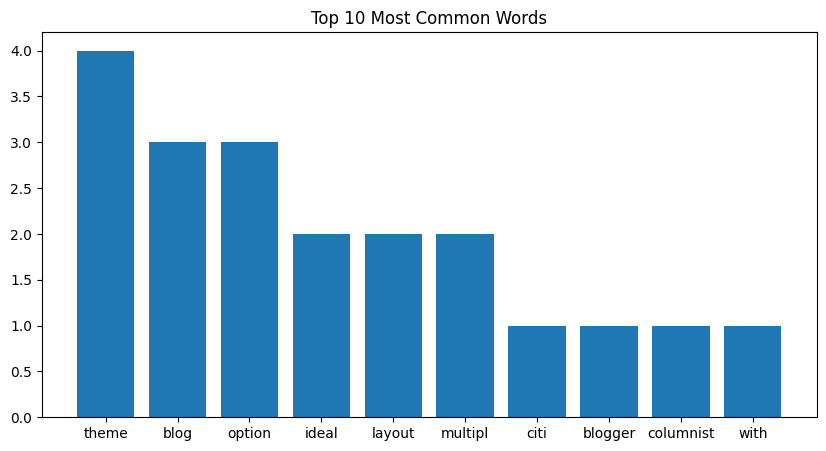

In [18]:
import matplotlib.pyplot as plt
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.show()

In [22]:
pip install wordcloud matplotlib

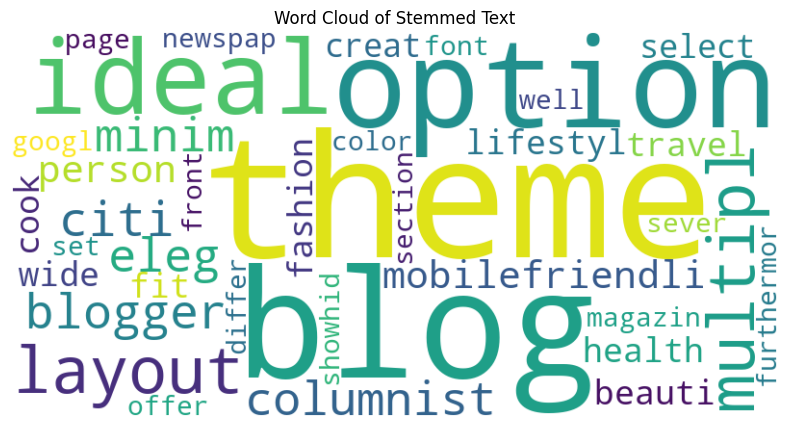

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure you have the stemmed tokens in a list called stemmed_tokens
# Example: stemmed_tokens = ["inform", "retriev", "defin", "process", ...]

# Joining the stemmed tokens into a single string for the word cloud
stemmed_text = ' '.join(stemmed_tokens)

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(stemmed_text)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Stemmed Text")
plt.show()
